# Ανάλυση Δεδομένων Μάθησης - Ομαδική Εργασία | Κελεπίρη Ζωή (78) & Ευάγγελος Βασιλόγαμβρος (100)

## Overview

Dataset
: https://archive.ics.uci.edu/ml/datasets/Wine

These data are the
results of a chemical analysis of wines grown in the same region in Italy but derived from
three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three
types of wines.

Variables

*   class --> Τάξη
*   Alcohol --> Αλκοόλ
*   Malicacid --> Μηλοξίνη
*   Ash --> Στάχτη
*   Alcalinity_of_ash --> Αλκαλικότητα της στάχτης
*   Magnesium --> Μαγνήσιο
*   Total_phenols --> Συνολικές φαινόλες
*   Flavanoids --> Φλαβανοειδή
*   Nonflavanoid_phenols --> Μη φλαβονοειδείς φαινόλες
*   Proanthocyanins --> Προανθοκυανίνες
*   Color_intensity --> Ένταση χρώματος
*   Hue --> Απόχρωση
*   0D280_0D315_of_diluted_wines --> 0D280_0D315 των αραιωμένων κρασιών
*   Proline --> Προλίνη

## Ανάλυση Δεδομένων

### 1. Import libraries


Εισάγω τις βιβλιοθήκες που θα χρησιμοποιήσουμε σε όλη την ανάλυση.

In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

### 2. Read from file and present onscreen few rows of data


Διαβάζουμε τα δεδομένα του wine data set.

In [ ]:
pip install ucimlrepo

In [ ]:
# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
df = pd.DataFrame(data=X)
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 3. Present some key information about data


Παρουσιάζουμε τις βασικές πληροφορίες για τα δεδομένα με τη μέθοδο [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) της pandas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

### 4. Present descriptive statistics of data


Η στατιστική ανάλυση των δεδομένων γίνεται με τη μέθοδο [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) της pandas.

In [ ]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 5. Ιστογράμματα


In [ ]:
dfAlcohol = df['Alcohol']
dfMalicacid = df['Malicacid']
dfAsh = df['Ash']
dfAlcalinity_of_ash = df['Alcalinity_of_ash']
dfMagnesium = df['Magnesium']
dfTotal_phenols = df['Total_phenols']
dfFlavanoids = df['Flavanoids']
dfNonflavanoid_phenols = df['Nonflavanoid_phenols']
dfProanthocyanins = df['Proanthocyanins']
dfColor_intensity = df['Color_intensity']
dfHue = df['Hue']
df0D280_0D315_of_diluted_wines = df['0D280_0D315_of_diluted_wines']
dfProline = df['Proline']

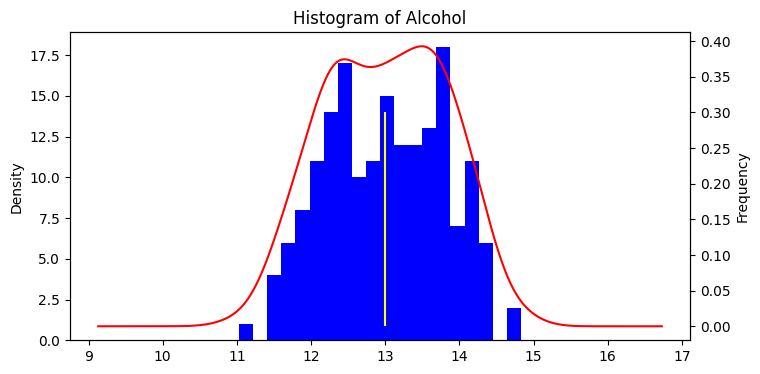

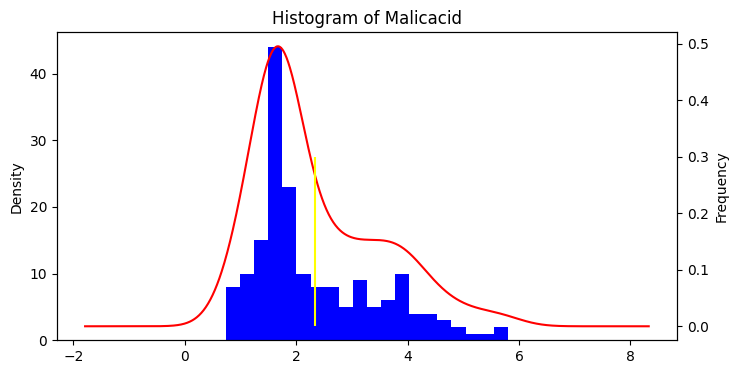

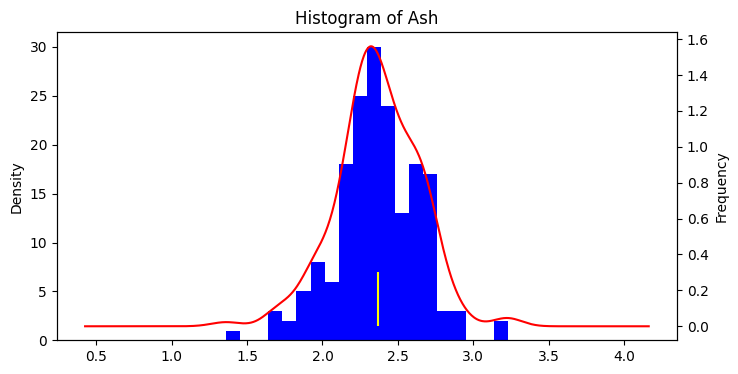

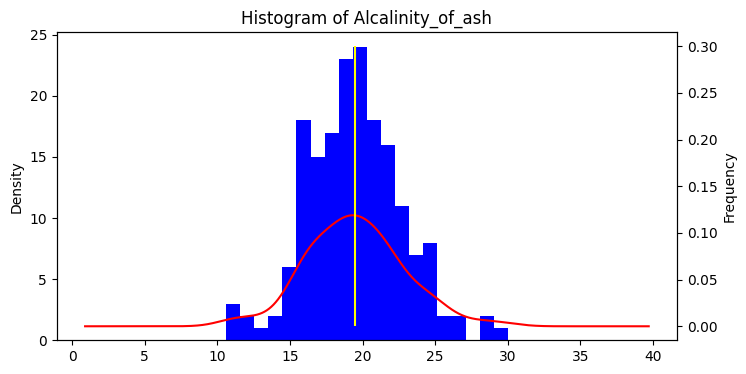

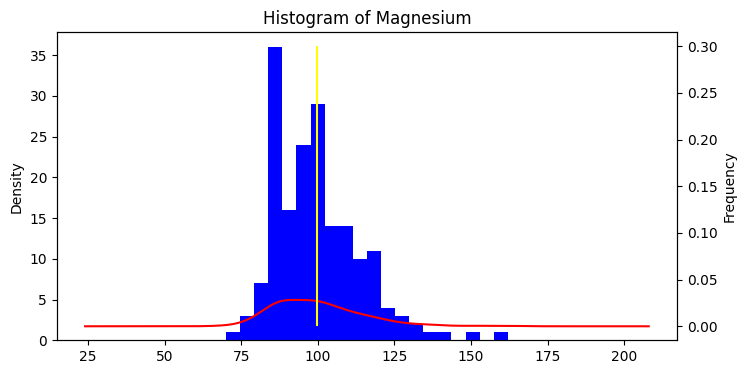

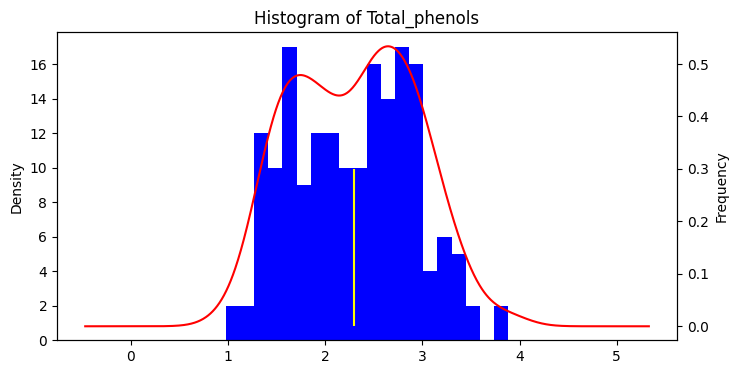

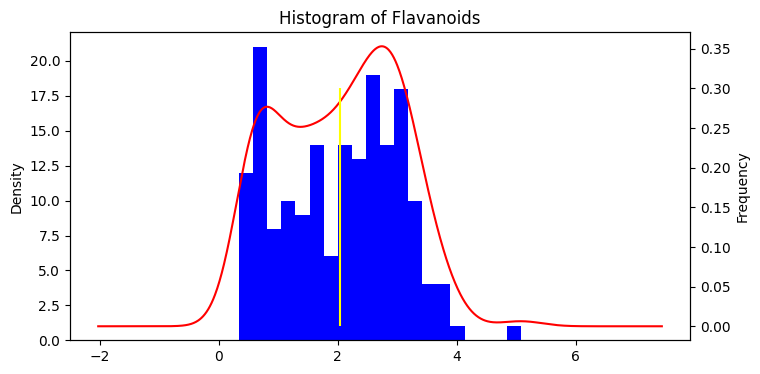

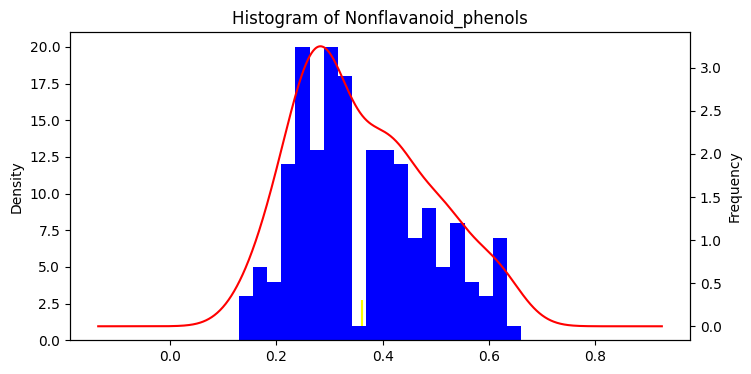

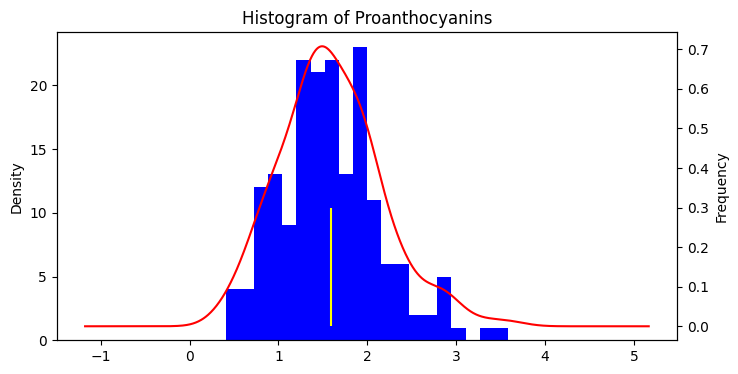

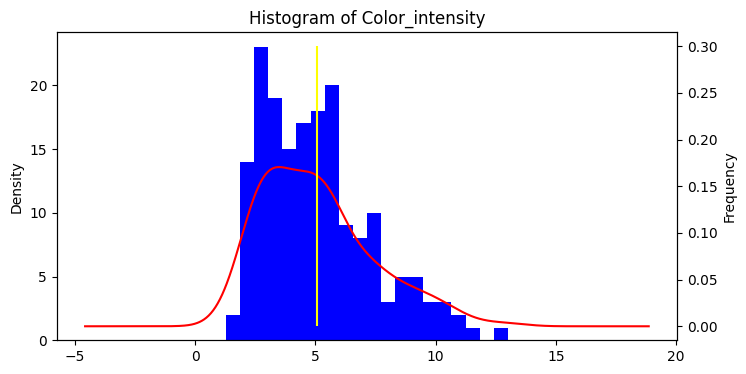

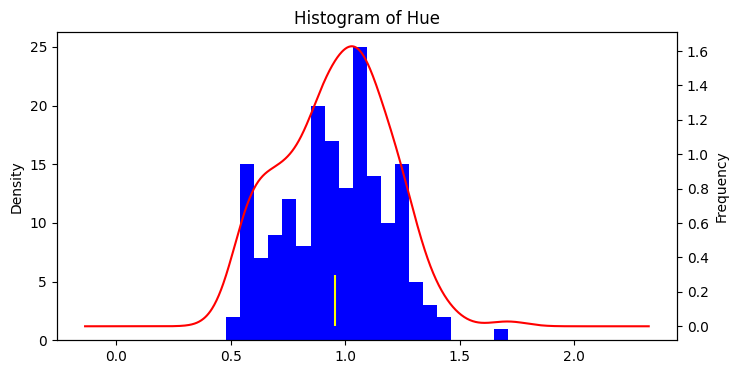

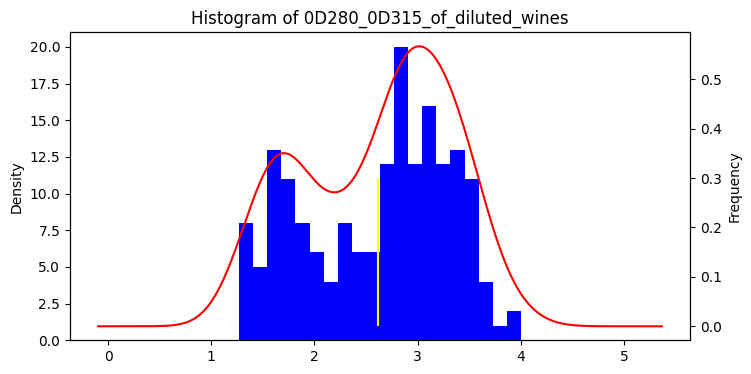

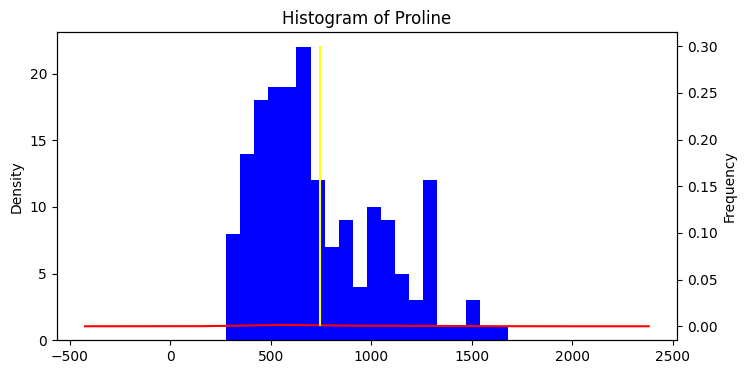

In [ ]:
import matplotlib.pyplot as plt
for column in df.columns:
    # Create a histogram for each variable
    plt.figure(figsize=(8,4))
    df[column].plot(kind = 'hist', bins = 20, color = 'blue')
    df[column].plot(kind = 'kde', secondary_y = True, color = 'red')
    plt.vlines(df[column].mean(), ymin = 0, ymax = 0.3, linewidth = 1.5, color = 'yellow' )
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

    # Show the plot
    plt.show()


### 6. Boxplot


In [ ]:
df['class'] = y
dfclass = df['class']

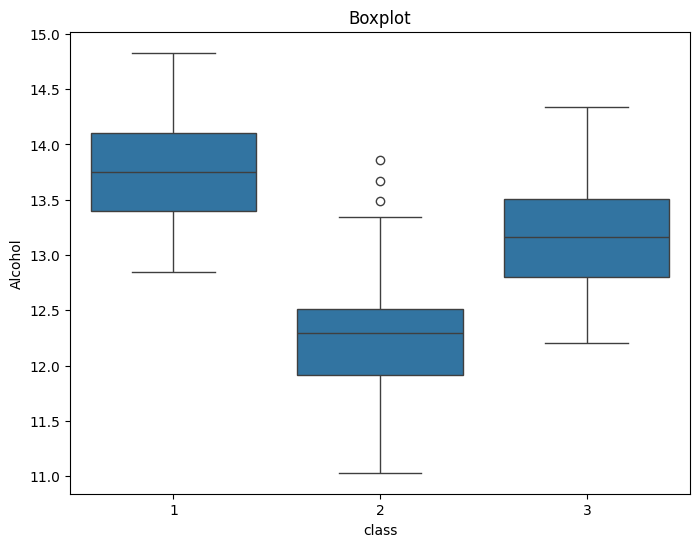

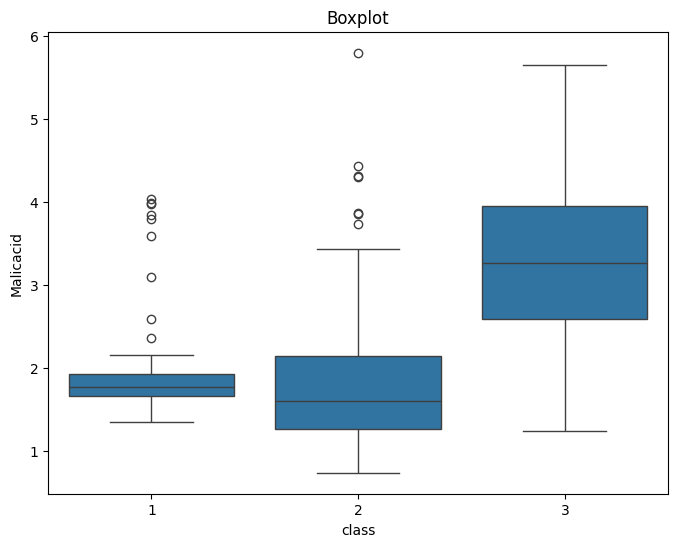

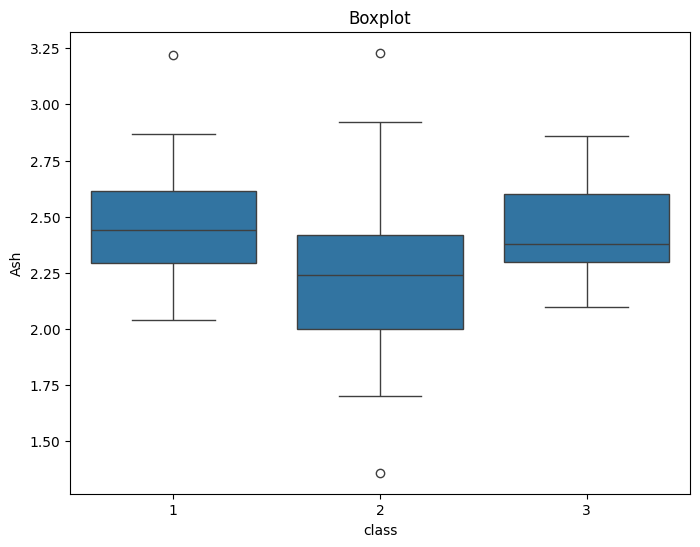

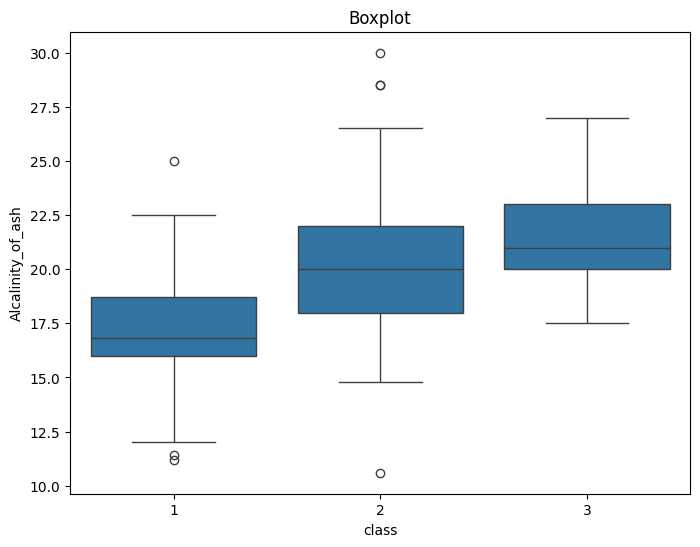

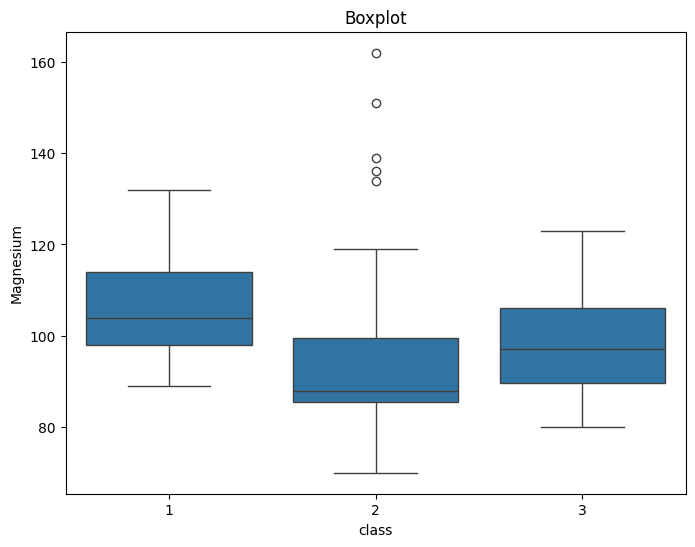

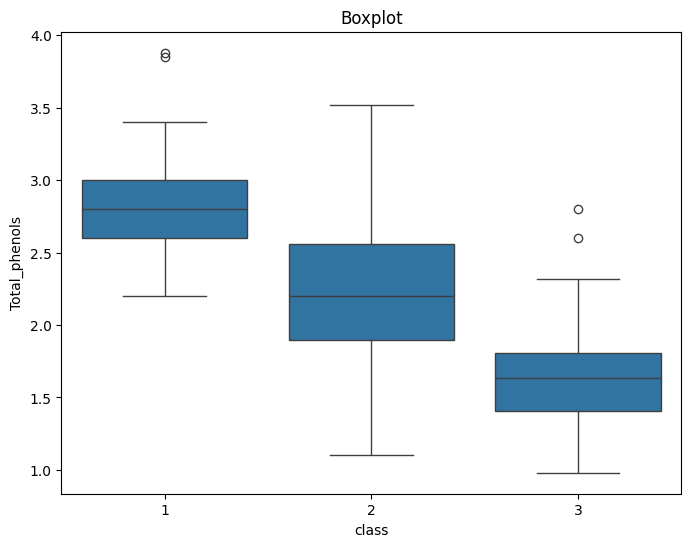

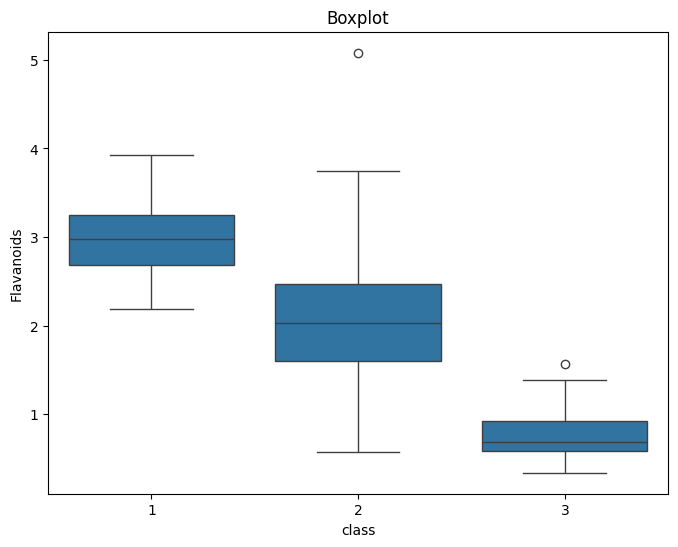

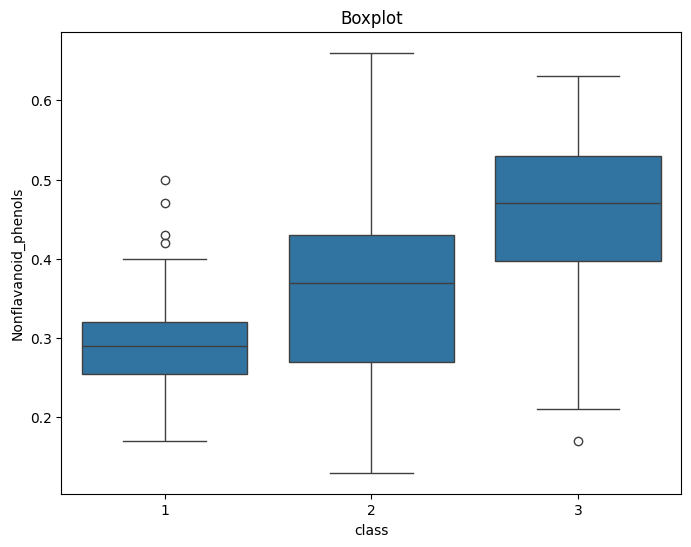

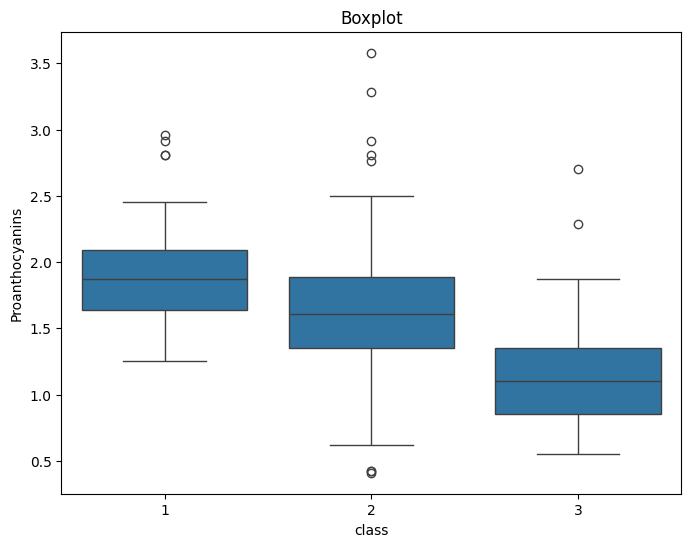

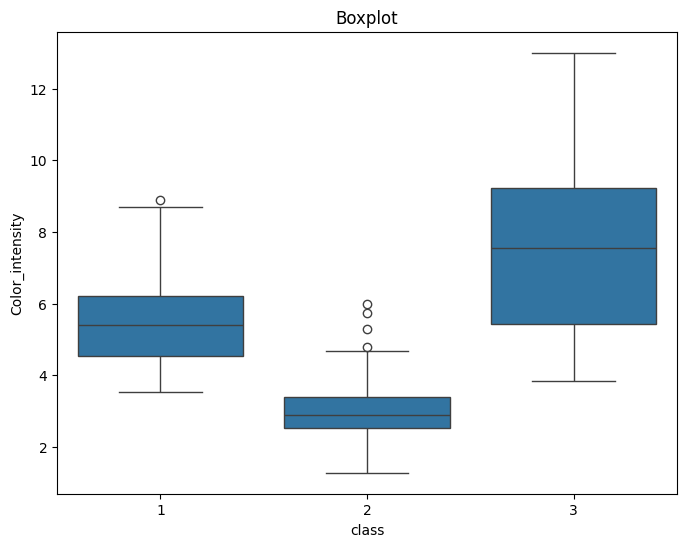

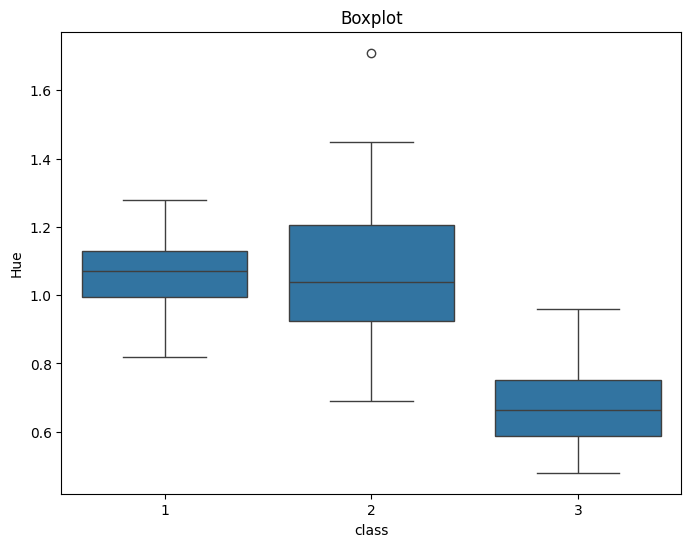

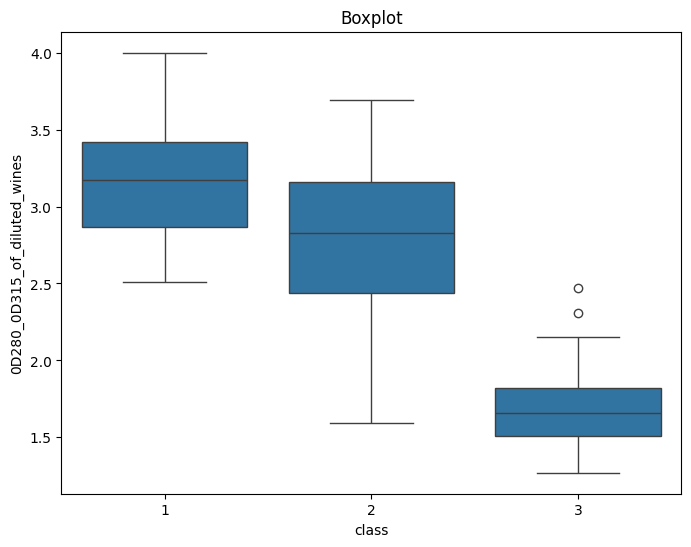

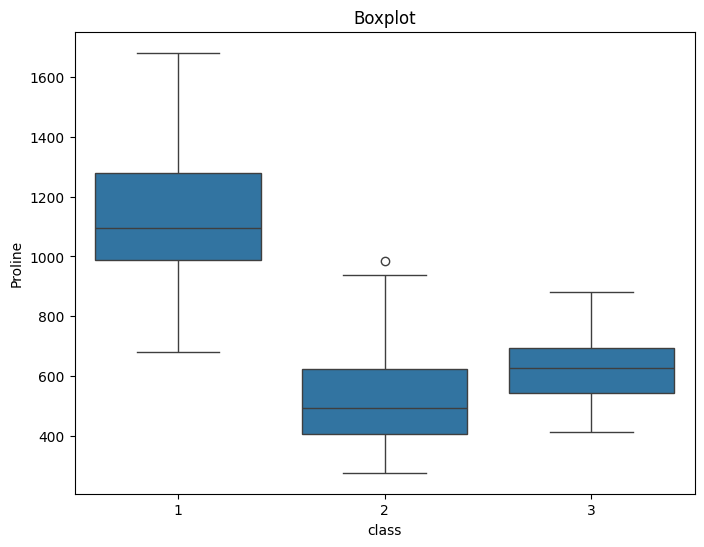

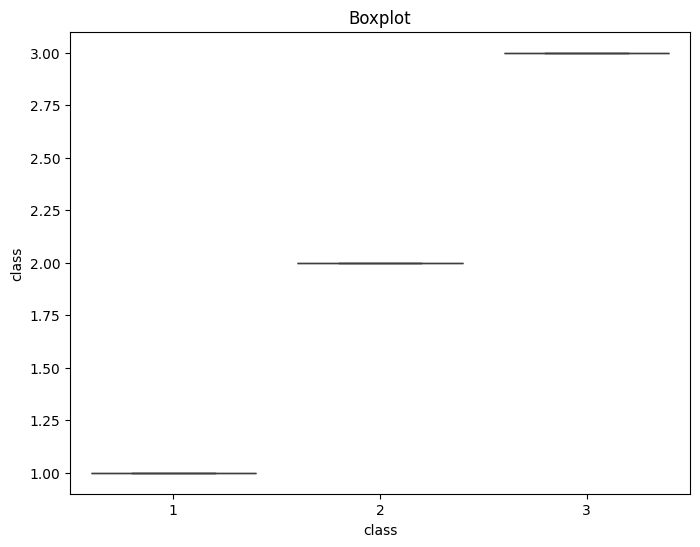

In [ ]:
import seaborn as sns

for column in df.columns:
# Create a box plot for each variable
  plt.figure(figsize=(8, 6))
  sns.boxplot(x= df['class'], y= df[column])
  plt.title(f'Boxplot')
  plt.show()

## 7. Skewness

In [ ]:
#skewness for each var
skewness_df = pd.DataFrame(columns=['Variable', 'Skewness'])
for column in df.columns:
    # Calculate the skewness for each variable
    skewness = df[column].skew()
    skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)

# Print or store the skewness values
print(skewness_df)

                        Variable  Skewness
0                        Alcohol -0.051482
1                      Malicacid  1.039651
2                            Ash -0.176699
3              Alcalinity_of_ash  0.213047
4                      Magnesium  1.098191
5                  Total_phenols  0.086639
6                     Flavanoids  0.025344
7           Nonflavanoid_phenols  0.450151
8                Proanthocyanins  0.517137
9                Color_intensity  0.868585
10                           Hue  0.021091
11  0D280_0D315_of_diluted_wines -0.307285
12                       Proline  0.767822
13                         class  0.107431


<ipython-input-31-5431626a149b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-31-5431626a149b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-31-5431626a149b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-31-5431626a149b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append

## 8. Ανάλυση σε όλο το data set

### Split the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9778

Confusion Matrix:
[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0000

Confusion Matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<ipython-input-96-3fee79e8ee32>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


### KNN

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with k=3 (you can choose a different value)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_result)

Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Decision Tree

0.9166666666666666

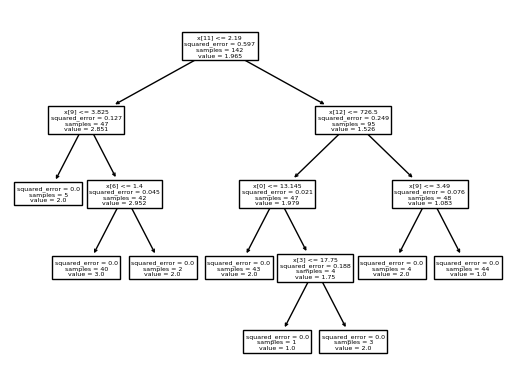

In [ ]:
# Create a Decision Tree
clf = tree.DecisionTreeRegressor()

# Train the DecisionTree
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

# Print the result
accuracy

### Gradient Boosting

In [ ]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

### AdaBoost

In [ ]:
# Create a AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
# Train the Classifier
clf.fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9444444444444444

### 9. What is the correlation coefficient for all column combinations in the data file?

Κάντοντας χρήση της μεθόδου [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) παρουσιάζω τον παρακάτω πίνακα με το correlation coefficient όλων των συνδυασμών των στηλών.

In [ ]:
#coefficient correlation
df.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Text(0.5, 1.0, 'Correlation Heatmap')

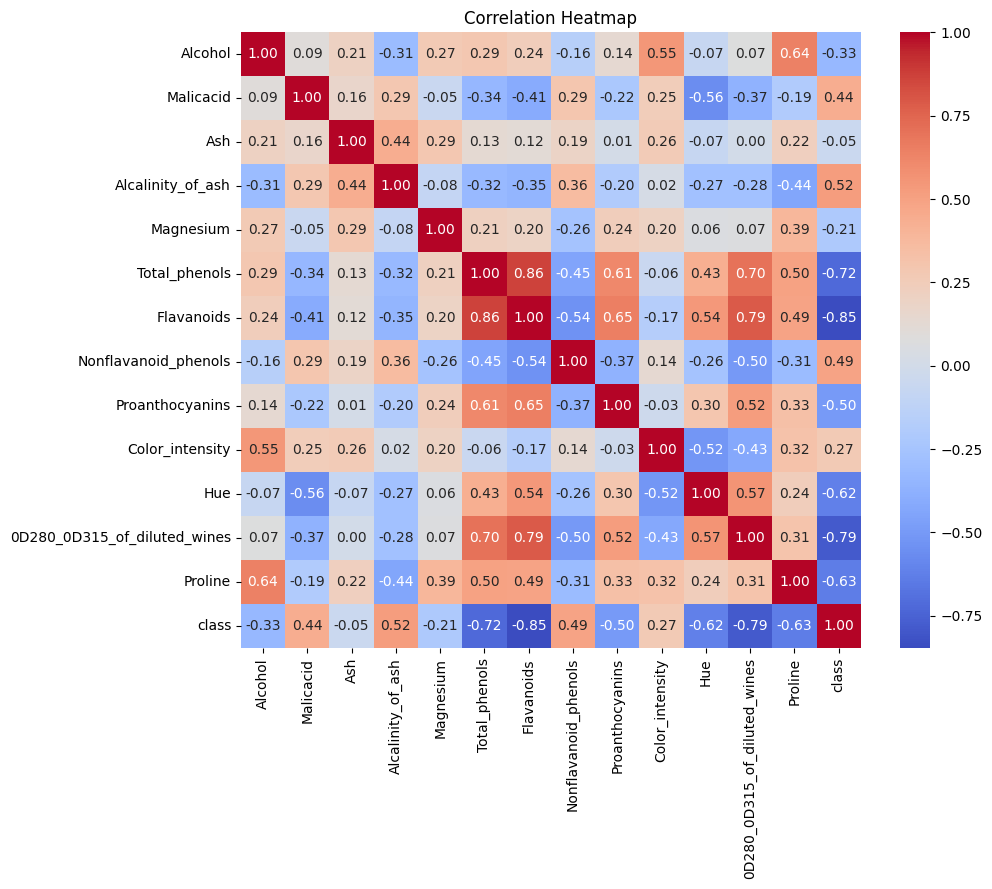

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

## 10. Ανάλυση δεδομένων αφαιρόντας μεταβλητές με υψηλή συσχέτιση (>0.7)

In [ ]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

Flavanoids
0D280_0D315_of_diluted_wines


### Drop columns

In [ ]:
X2 = df.drop('Flavanoids',axis=1)
X2 = X2.drop('0D280_0D315_of_diluted_wines',axis=1)
# new_df = new_df.drop('Nonflavanoid_phenols',axis=1)
# new_df = new_df.drop('Color_intensity',axis=1)
# new_df = new_df.drop('Proline',axis=1)
# new_df = new_df.drop('Hue',axis=1)
# new_df = new_df.drop('class',axis=1)
X2

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Proline
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,1065
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,1050
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,1185
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,1480
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,735
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,1.06,7.70,0.64,740
174,13.40,3.91,2.48,23.0,102,1.80,0.43,1.41,7.30,0.70,750
175,13.27,4.28,2.26,20.0,120,1.59,0.43,1.35,10.20,0.59,835
176,13.17,2.59,2.37,20.0,120,1.65,0.53,1.46,9.30,0.60,840


### Split the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9778

Confusion Matrix:
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0000

Confusion Matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<ipython-input-106-a49d96d86631>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


### KNN

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with k=3 (you can choose a different value)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_result)

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Decision Tree

0.9722222222222222

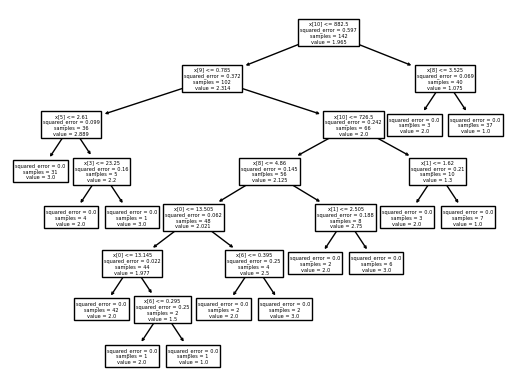

In [ ]:
# Create a Decision Tree
clf = tree.DecisionTreeRegressor()

# Train the DecisionTree
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

# Print the result
accuracy

### Gradient Boosting

In [ ]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

### AdaBoost

In [ ]:
# Create a AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
# Train the Classifier
clf.fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222

## 11. Ανάλυση δεδομένων αφαιρόντας μεταβλητές με υψηλή συσχέτιση (>0.5)

In [ ]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.5:
            name = df.corr().columns[a]
            print(name)

Flavanoids
Nonflavanoid_phenols
Proanthocyanins
Proanthocyanins
Color_intensity
Hue
Hue
Hue
0D280_0D315_of_diluted_wines
0D280_0D315_of_diluted_wines
0D280_0D315_of_diluted_wines
0D280_0D315_of_diluted_wines
0D280_0D315_of_diluted_wines
Proline


### Drop columns

In [ ]:
X3 = df.drop('Flavanoids',axis=1)
X3 = X3.drop('0D280_0D315_of_diluted_wines',axis=1)
X3 = X3.drop('Nonflavanoid_phenols',axis=1)
X3 = X3.drop('Color_intensity',axis=1)
X3 = X3.drop('Proline',axis=1)
X3 = X3.drop('Hue',axis=1)
X3 = X3.drop('Proanthocyanins',axis=1)
X3

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols
0,14.23,1.71,2.43,15.6,127,2.80
1,13.20,1.78,2.14,11.2,100,2.65
2,13.16,2.36,2.67,18.6,101,2.80
3,14.37,1.95,2.50,16.8,113,3.85
4,13.24,2.59,2.87,21.0,118,2.80
...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68
174,13.40,3.91,2.48,23.0,102,1.80
175,13.27,4.28,2.26,20.0,120,1.59
176,13.17,2.59,2.37,20.0,120,1.65


### Split the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8889

Confusion Matrix:
[[14  0  1]
 [ 1 16  1]
 [ 2  0 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        15
           2       1.00      0.89      0.94        18
           3       0.83      0.83      0.83        12

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.88        45
weighted avg       0.90      0.89      0.89        45



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9333

Confusion Matrix:
[[15  0  0]
 [ 1 17  0]
 [ 2  0 10]]

Classification Report:
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        15
           2       1.00      0.94      0.97        18
           3       1.00      0.83      0.91        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



<ipython-input-116-e3dc0b8889ec>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


### KNN

In [ ]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with k=3 (you can choose a different value)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report_result)

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       1.00      0.86      0.92        14
           3       0.73      1.00      0.84         8

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.88        36
weighted avg       0.91      0.89      0.89        36



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Decision Tree

0.8888888888888888

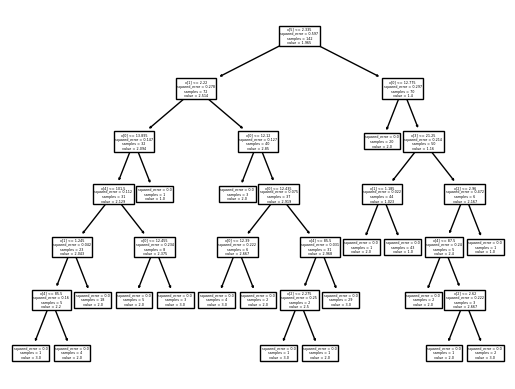

In [ ]:
# Create a Decision Tree
clf = tree.DecisionTreeRegressor()

# Train the DecisionTree
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

# Print the result
accuracy

### Gradient Boosting

In [ ]:
# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222

### AdaBoost

In [ ]:
# Create a AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
# Train the Classifier
clf.fit(X_train, y_train)
# Evaluate the model
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9722222222222222